# `banyan v0`

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


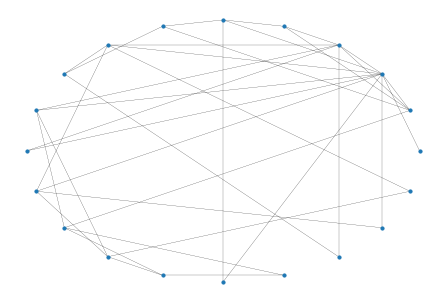

In [239]:
# The Barabási–Albert model should approximate well a social network.
P = nx.barabasi_albert_graph(20, 2)

nx.draw(
    P,
    pos=nx.circular_layout(P),
    node_size=10,
    width=0.2,
)

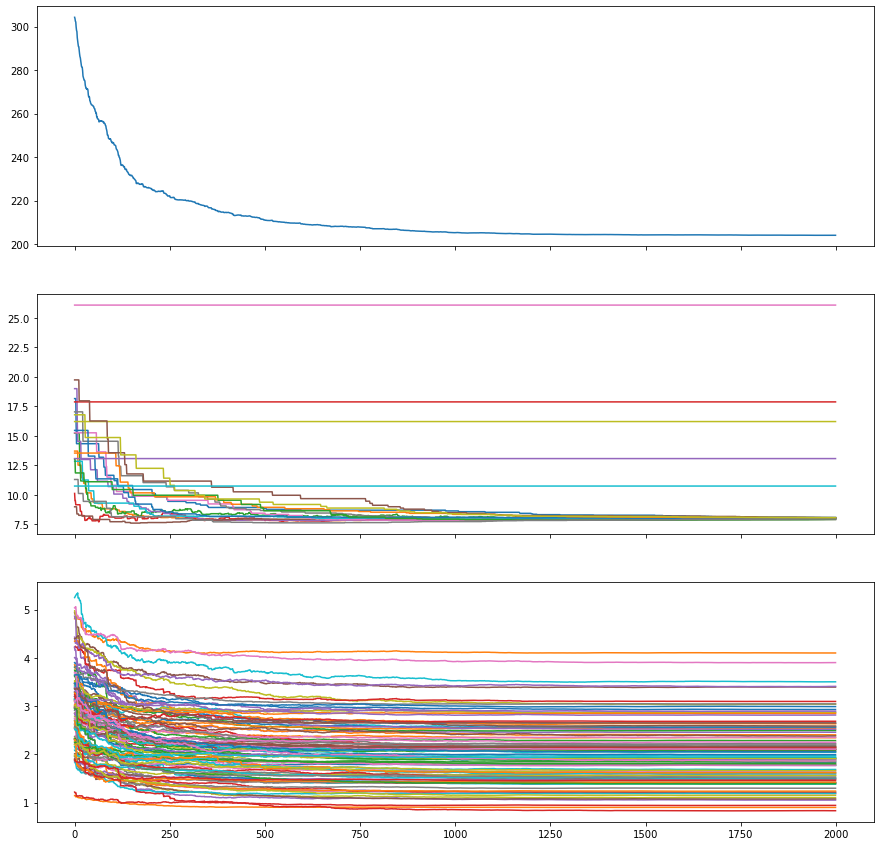

In [309]:
nodes = 20
words = 100
ticks = 2000

for node_index in P.nodes:
    s = np.random.default_rng().pareto(5, words)
    s = s / max(s)
    P.nodes[node_index]['lexicon'] = s

prof = np.zeros([ticks,nodes,words])

for tick in range(ticks):
    edge_index = np.random.randint(P.number_of_nodes())
    direction = np.random.choice([+1,-1], 1)[0] # random direction on edge
    source_index, target_index = list(P.edges())[edge_index][::direction]
    source = P.nodes[source_index]['lexicon']
    target = P.nodes[target_index]['lexicon']
    P.nodes[target_index]['lexicon'] = target*(source/target)**0.1
    ls = np.array(list(dict(P.nodes.data('lexicon')).values()))
    #print(np.sum(ls, axis=(0,1)))
    prof[tick] = ls

fig, axs = plt.subplots(3, sharex=True, figsize=(15,15))
axs[0].plot(np.sum(prof, axis=(1,2))) # global proficiency
axs[1].plot(np.sum(prof, axis=2)) # proficiency by node
axs[2].plot(np.sum(prof, axis=1)) # proficiency by word
plt.show()